In [24]:
pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#Import the libraries


import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt


# Initialize the hyper parameters

In [26]:

input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
num_epochs    = 5     # The number of times entire dataset is trained
batch_size    = 100   # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence

# Load dataset

In [27]:

train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [28]:

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Building Neural Network

In [29]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [30]:
net = Net(input_size, hidden_size, num_classes)

# Computational Graph of the network

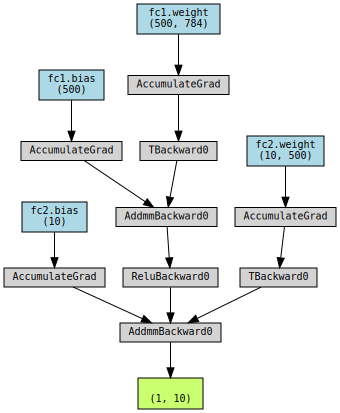

In [31]:
# Define the computational graph
from torchviz import make_dot

x = torch.randn(1, 784)  # example input
y = net(x)
make_dot(y, params=dict(net.named_parameters()))

In [32]:
# Generate a random input tensor
input_tensor = torch.randn(1, input_size)

# Call make_dot() to generate the graph
graph = make_dot(net(input_tensor), params=dict(net.named_parameters()))
graph.render('FNN', format='png')

'FNN.png'

In [33]:
use_cuda = True

In [34]:
if use_cuda and torch.cuda.is_available():
    net.cuda()

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Training and testing 

In [42]:
# Create a list to store training loss and test loss
train_losses = []
test_losses = []

In [43]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        train_losses.append(loss.item())
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))


Epoch [1/5], Step [100/600], Loss: 0.0133
Epoch [1/5], Step [200/600], Loss: 0.0498
Epoch [1/5], Step [300/600], Loss: 0.0085
Epoch [1/5], Step [400/600], Loss: 0.0412
Epoch [1/5], Step [500/600], Loss: 0.0257
Epoch [1/5], Step [600/600], Loss: 0.0197
Epoch [2/5], Step [100/600], Loss: 0.0117
Epoch [2/5], Step [200/600], Loss: 0.0039
Epoch [2/5], Step [300/600], Loss: 0.0241
Epoch [2/5], Step [400/600], Loss: 0.0251
Epoch [2/5], Step [500/600], Loss: 0.0079
Epoch [2/5], Step [600/600], Loss: 0.0016
Epoch [3/5], Step [100/600], Loss: 0.0128
Epoch [3/5], Step [200/600], Loss: 0.0028
Epoch [3/5], Step [300/600], Loss: 0.0341
Epoch [3/5], Step [400/600], Loss: 0.0153
Epoch [3/5], Step [500/600], Loss: 0.0116
Epoch [3/5], Step [600/600], Loss: 0.0031
Epoch [4/5], Step [100/600], Loss: 0.0025
Epoch [4/5], Step [200/600], Loss: 0.0053
Epoch [4/5], Step [300/600], Loss: 0.0034
Epoch [4/5], Step [400/600], Loss: 0.0041
Epoch [4/5], Step [500/600], Loss: 0.0020
Epoch [4/5], Step [600/600], Loss:

In [44]:
correct = 0
total = 0
for epoch in range(num_epochs):
  for i,(images, labels)  in enumerate(test_loader):
      images = Variable(images.view(-1, 28*28))
      labels = Variable(labels)
      if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
      
      optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
      outputs = net(images)                             # Forward pass: compute the output class given a image
      loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
      loss.backward()                                   # Backward pass: compute the weight
      optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
    
      test_losses.append(loss.item())

      _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
      total += labels.size(0)                    # Increment the total count
      correct += (predicted == labels).sum()     # Increment the correct count

      
  print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))
    

Accuracy of the network on the 10K test images: 98 %
Accuracy of the network on the 10K test images: 98 %
Accuracy of the network on the 10K test images: 99 %
Accuracy of the network on the 10K test images: 99 %
Accuracy of the network on the 10K test images: 99 %


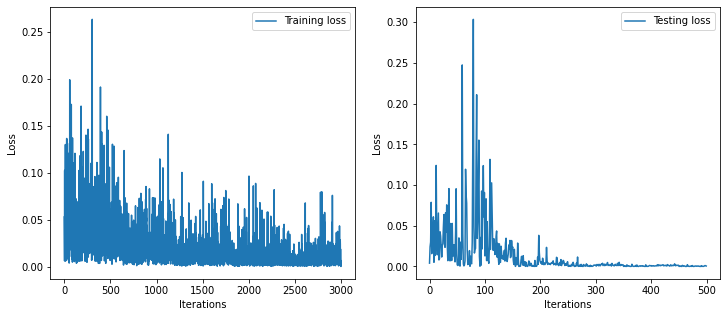

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses, label='Training loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(test_losses, label='Testing loss')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

